<a href="https://colab.research.google.com/github/rzeller/sandbox/blob/main/noteboooks/develop_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/code/sandbox

/content/drive/MyDrive/code/sandbox


In [15]:
!git pull origin HEAD

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/rzeller/sandbox
 * branch            HEAD       -> FETCH_HEAD
Updating 468539f..eb6e2aa
Fast-forward
 .../create_shipping_fee_data.ipynb                                        | 0
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename create_shipping_fee_data.ipynb => notebooks/create_shipping_fee_data.ipynb (100%)


In [17]:
from importlib import reload
import create_data
reload(create_data)

<module 'create_data' from '/content/drive/My Drive/code/sandbox/create_data.py'>

In [18]:
df = create_data.create_synthetic_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
df.head()

,mnist_label,image,weight,pickup_x,pickup_y,dropoff_x,dropoff_y,distance,shipping_fee,train_test
0,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5.408326,2044.894335,526.932781,681.590512,215.282170,1398.471815,7.563392,train
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",-0.466388,1306.827710,126.124026,1439.279430,279.702709,202.805005,5.000000,train
2,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4.297544,1005.352596,442.201495,1441.618292,64.585654,576.993485,5.000000,train
3,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.625200,1829.997094,51.020981,623.866465,996.389647,1532.472841,5.000000,train
4,9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9.061304,2501.958980,140.179468,1562.973998,86.162393,940.537422,8.522495,train


#Create model

In [20]:
import tensorflow

In [2]:
#models

# create cnn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape

# 784 - [32C5-P2] - [64C5-P2] - 128 -10
def create_cnn(regress=False, summarize=False):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPool2D())
  model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))

  if regress:
    model.add(Dense(10, activation='softmax'))

  if summarize:
    print(model.summary())
  
  return model


In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = create_cnn(regress=True, summarize=True)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 20
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs,
          batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

(0.975, 1.0)

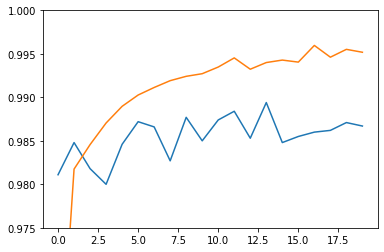

In [16]:
from matplotlib import pylab as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.ylim([0.975, 1])

In [12]:
history.history

{'accuracy': [0.9540166854858398,
  0.9817500114440918,
  0.9845666885375977,
  0.9870499968528748,
  0.9889666438102722,
  0.9902666807174683,
  0.9911333322525024,
  0.9919166564941406,
  0.9924166798591614,
  0.9927166700363159,
  0.993483304977417,
  0.994533360004425,
  0.993233323097229,
  0.9940000176429749,
  0.9942833185195923,
  0.9940500259399414,
  0.9959666728973389,
  0.994616687297821,
  0.9955166578292847,
  0.9951833486557007],
 'loss': [0.22259113192558289,
  0.06330691277980804,
  0.052690669894218445,
  0.04281654953956604,
  0.03807969018816948,
  0.036497823894023895,
  0.032452650368213654,
  0.031925469636917114,
  0.02905629388988018,
  0.032600682228803635,
  0.02634207159280777,
  0.023401468992233276,
  0.033393990248441696,
  0.027204595506191254,
  0.029058046638965607,
  0.032719213515520096,
  0.020420145243406296,
  0.03427823260426521,
  0.025097252801060677,
  0.03422551974654198],
 'val_accuracy': [0.9811000227928162,
  0.9847999811172485,
  0.981800